This is the first post from Data Dolittle, a data analytics company that looks to empower other data scientists and businesses looking to capture insight from their data. What better way to start than with a post about natural language processing (NLP) using Hugh Lofting’s Doctor Dolittle. In order to tell the story of NLP, we will be using python 3.7, nltk, requests, string, PIL (optional), wordcloud (optional), and bs4. Now let’s begin:

#### Goals:
Once upon a time, there was a solider in the trenches of WWI. The horrors of war weighed heavy upon his shoulders. Day in and day out, he was subjected to the worst of humanity in dangerous conditions. It was his young daughter that broke the drudge of trench warfare providing a reason to carry on. The short and infrequent commutations with the solider’s daughter left the solider with a desire to engage in a more meaningful way. The solider wanted to create a world for his daughter, a world better than the reality he was living. The solider created a hero like no other, a hero to all those traditionally silenced, the animals. This solider’s name was Hugh Lofting and in creating Doctor Dolittle, Hugh created a world to provide hope to his daughter and countless other children around the world. Doctor Dolittle provided an escape for the author as much as the target audience. Hugh dreamed up a perfectly idyllic town Puddleby-on-the-Marsh as the opening setting that takes the protagonist on a fantastical journey to far away lands all the while creating unique interactions with engaging characters. It is these characters that make our good Doctor unique. You see, Doctor Dolittle is taught the secrets of animal language by his trusty translator, Polynesia. Polynesia is a parrot capable of both human speech and animal speech. The Doctor’s newly acquired skills lead him to alienate humanity to protect animals across the globe. This focus away from humanity may have been in response to Hugh’s experiences of mankind in the trenches. Here we explore the details of Hugh’s imaginative world, exploring the language used, the sentiment of the chapters, the frequency of each animal’s appearance, and try to match historical data with chapters to search for hidden messages from the trenches. Follow us on our own journey through the world of Doctor Dolittle! 

#### The Text:
We begin our story with the text. Our journey is aided by the availability of historical texts online through Project Gutenberg. These noble curators of knowledge have recorded the publications that involve our good Doctor. To retrieve the text, we can choose one of three paths. First, our hero can purchase a pdf of the books from a certified book seller. Second, our hero can download the text directly from Project Gutenberg and place them in a folder titled “data”. Lastly, our hero can choose to engage in web-scraping. A most difficult task, yet surely one you as our hero can accomplish! The hero can perform web-scraping by following the map of commands below 

In [19]:
import requests
from bs4 import BeautifulSoup
import nltk
nltk.download("stopwords")
nltk.download('vader_lexicon')

### Pull 
url = 'http://www.gutenberg.org/files/501/501-0.txt'
res = requests.get(url)
html_page = res.content


soup = BeautifulSoup(html_page, 'html.parser')
text = soup.find_all(text=True)

### Convert to string and clean text to remove annotations
text = str(text)
text = text.replace("\n", " ").replace("\r", " ").replace("\\r", " ").replace("\\n", " ").replace("_", "").lower()
text = text.split("the first chapter")[1].split("illustration: the end")[0]

### Save File to Data Folder
with open("../data/Doctor_Dolittle.txt", "w") as f:
    f.write(text)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stronglab2/nltk_data...


Following one of these three paths should lead our hero to create a folder titled “data” with both books stored as text files. 

#### The Language
Hugh’s tales are targeted to a younger audience and therefore we can expect simpler language and a less complex vocabulary. Let’s search the text for the longest word without hyphens using the code below:

In [2]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
tokens = [i.lower() for i in tokens]

## Uncomment and remove the ")" to get length of longest word
print("Longest word in text: " + max(tokens, key=len) )# + " is " + str(len(max(tokens, key=len))) + " characters long")


## Longest real word
tokens = [y for y in tokens if y != "cutterigsloop"]
print("Longest real word in text: " + max(tokens, key=len) + " is " + str(len(max(tokens, key=len))) + " characters long")

Longest word in text: cutterigsloop
Longest real word in text: grandfathers is 12 characters long


In [7]:
def Flesch_Kincaid(text):
    '''Flesch-Kincaid Grade Level
        Input:
            text:   raw text with periods ending sentences. 
        Returns:
            float:  flesch-kincaid grade level
    '''
    sentences = text.split('.')
    avg_sentence_len = sum(len(x.split()) for x in sentences) / len(sentences)
    
    syllables = sum(list(map(lambda x: 1 if x in ["a","i","e","o","u","y"] else 0,text)))
    word_count = len(text.split(' '))
    mean_syllables_per_word = syllables/float(word_count)
    
    
    return (0.39 * avg_sentence_len) + (11.8 * mean_syllables_per_word) - 15.59

In [11]:
print('The Flesch_Kincaid grade level of Dr. Dolittle is: ' + "{0:.3g}".format(Flesch_Kincaid(text)))

The Flesch_Kincaid grade level of Dr. Dolittle is: 7.37


Ah, we have discovered the most fearsome word within the text and the level of difficulty. This word was a misunderstanding from Gub-Gub the pig. Now, we should see how many other unique words accompany these monsters. This task is not as easy as it seems, for you see, there are many words alike and different that make counting each unique word hard. What do I mean by this? Surely our hero understands the word hard and harder mean very similar things in that they both describe how difficult a task or how strong a material is, yet a simple count would consider these two distinct words. To change the text so words that are similar are identifiable, we use a process called lemmatization. 

After accounting for similar words, our hero must remove words that are commonly used yet provide very little meaning. Stop words are the term for words such as **“the”**, **“is”**, and **“and”**. By brushing off the frequent stop word dust we are left with the gold of unique text. The code below removes stop words and helps our hero accomplish how many unique words are in the text. 

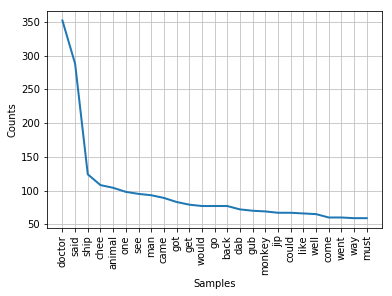

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

## A function to perform text processing
def text_processing(input_text):
    '''Text Processing Pipeline
        Input:
            text:   raw text 
        Returns:
            float:  lemmatized tokens with stop words removed
    '''
    ### Tokenize
    tokens = tokenizer.tokenize(input_text)

    ### lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(i) for i in tokens]


    ### Remove stopwords
    stops = set(stopwords.words('english'))
    values = [i for i in tokens if i not in stops]


    ### Remove weird items in tokens
    weird = ["wa", "u"]
    values = [i for i in values if i not in weird]

    ### Number of unique words
    #print("Number of unique words in text: " + str(len(set(values))))
    
    return(values)

values = text_processing(text)

%matplotlib inline
freq = nltk.FreqDist(values)
freq.plot(25, cumulative=False)

As we plot the most frequent words, we see the distribution follows Zipf's law meaning the most abundant words appear quite often. The good doctor said a lot in the story. What are words like **chee** and why do they appear so often? They are part of the animal names. Let's convert the animal names into animal species to get another view of the distribution. The animal species should move down the distribution because in a name like Chee Chee, the word chee is counted twice. The animal names in the Dolittle stories are pulled from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Doctor_Dolittle_characters).

#### The Animals

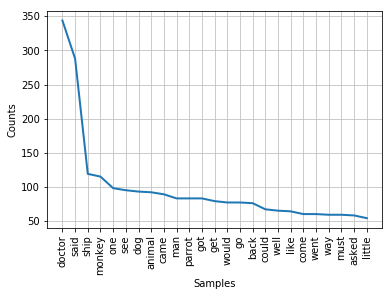

In [14]:
import string

## Remove Punctuation
text = text.translate(str.maketrans('', '', string.punctuation))
animals = {"polynesia":"parrot", "gubgub":"pig", "cheechee":"monkey",
           "tootoo":"owl","pushmipullyu":"two-headed unicorn", "whitey":"mouse", 
           "jip":"dog", "dabdab":"duck", "toggle":"horse", "cheapside":"sparrow"}

## Replace names in text
text = ' '.join([animals.get(i, i) for i in text.split()])

#### Repeat Prior Efforts using text processing function
values = text_processing(text)


%matplotlib inline
freq = nltk.FreqDist(values)
freq.plot(25, cumulative=False)

Doctor Dolittle has a large group of friends in a variety of different species. How many species to be exact? Our question is aided by the list of animal names within the data folder. We can use this list to pull the amount animal species from the text.

Doctor Dolittle interacts with 68 different kinds of animals


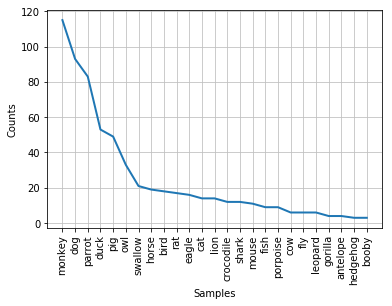

In [15]:
### Use list overlap
with open("../data/Animal_Names.txt", "r") as f:
    animals = f.readlines()
    animals = [x.split("\n")[0] for x in animals]
    
Animals_in_Text = set(animals) & set(tokens)
print("Doctor Dolittle interacts with " + str(len(Animals_in_Text)) + " different kinds of animals")

values = [i for i in values if i in Animals_in_Text]

%matplotlib inline
freq = nltk.FreqDist(values)
freq.plot(25, cumulative=False)

The Doctor sure interacts with a good deal of critters in the story. Which animals play a staring role in each chapter? To visualize this we will split the text into chapters, find the most abundant animal, then create a wordcloud in the shape of that animal using a mask and the wordcloud package.  

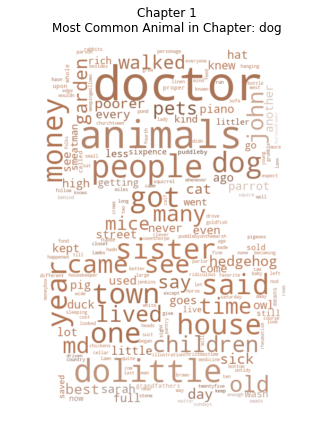

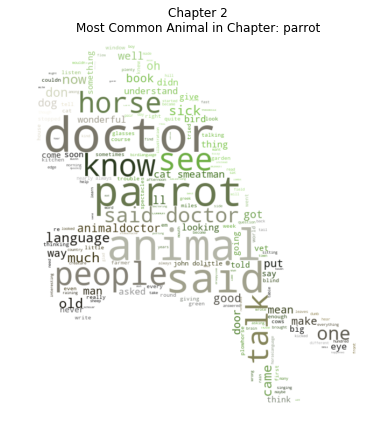

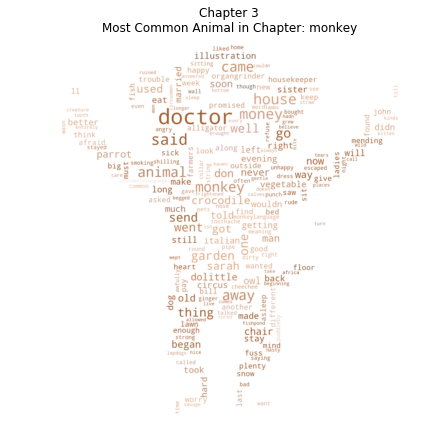

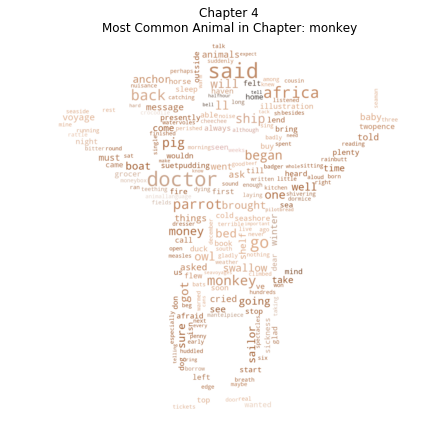

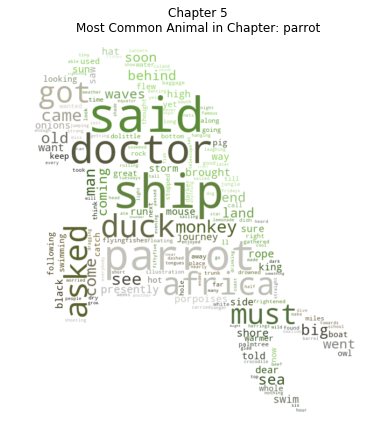

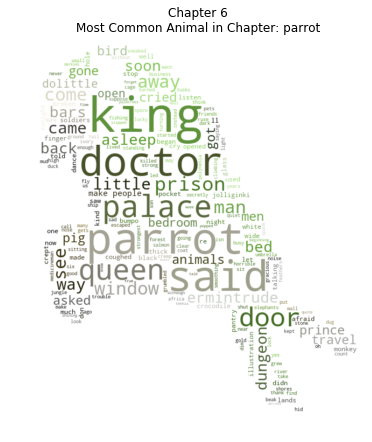

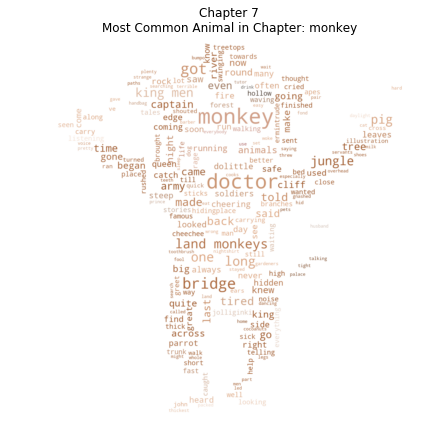

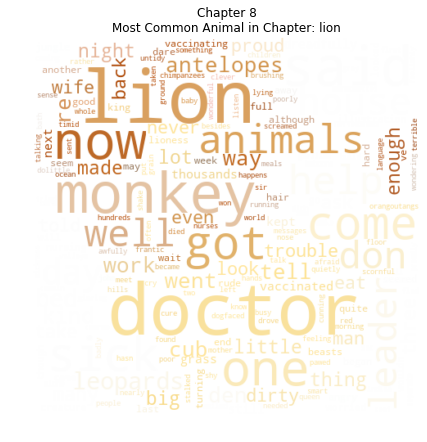

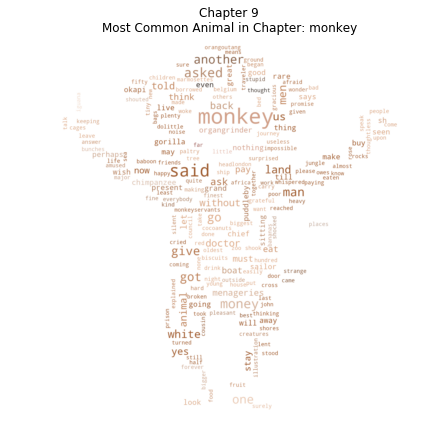

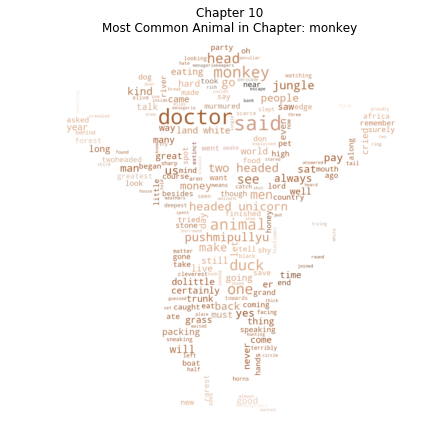

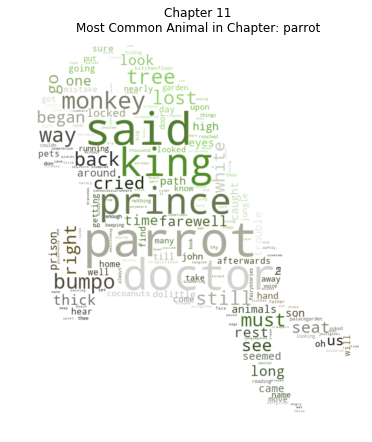

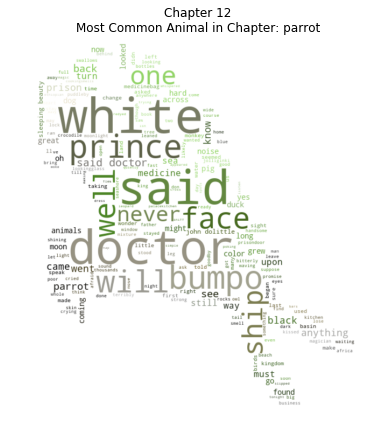

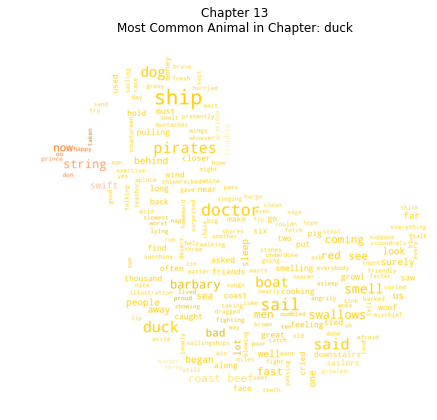

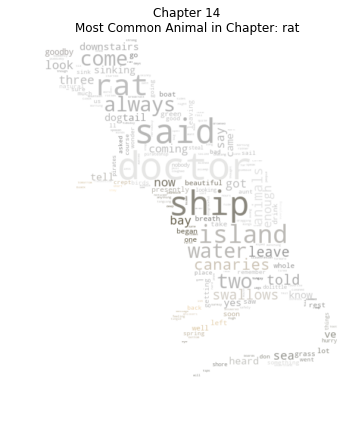

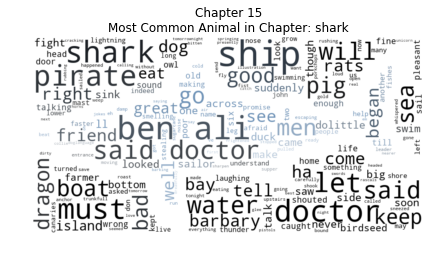

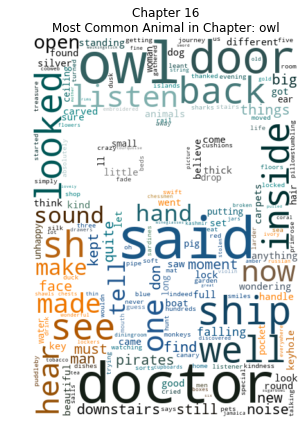

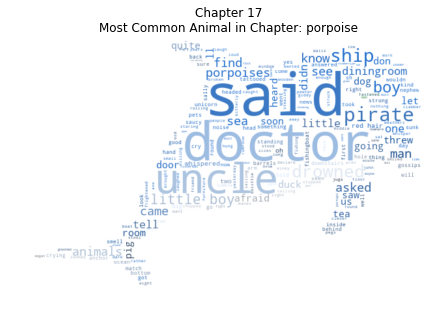

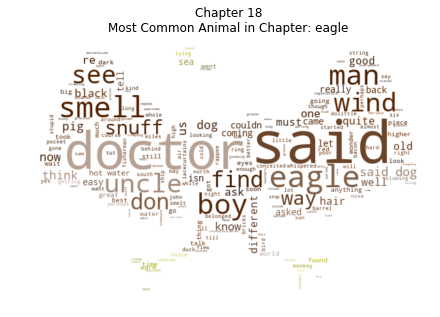

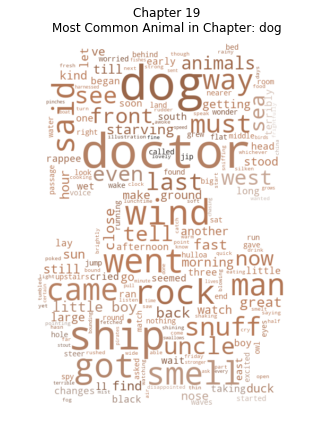

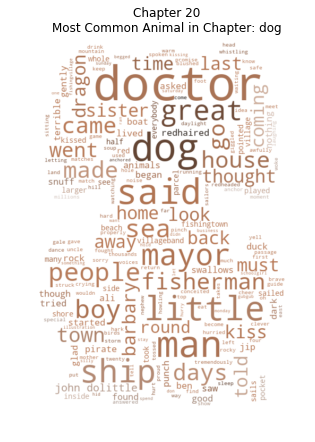

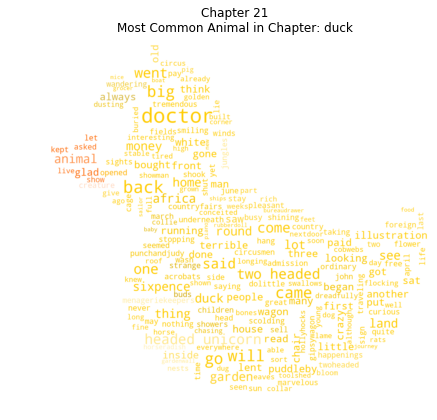

In [25]:
from collections import Counter
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt


## Split into chapters
Chapters = text.split("chapter")


count = 1
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('../data/Animal_WordClouds.pdf', "w") as pdf:
    for item in Chapters:
        values = text_processing(item)
        values = [i for i in values if i in animals]
    
        y = Counter(values).most_common(1)[0][0]
        path = "../data/Animals/" + y + ".png"
        mask = np.array(Image.open(path))
        wc = WordCloud(background_color="white", max_words=200, mask=mask,
               max_font_size=90, random_state=42)
    
        
        titles = "Chapter "+ str(count) + "\n" + "Most Common Animal in Chapter: " + y
        
        
        wc.generate(item)
        image_colors = ImageColorGenerator(mask)
        fig = plt.figure(figsize=[7,7])
        plt.title(label=titles)
        plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        count += 1
        _ = plt.show()
        pdf.savefig(fig)
    

We have learned alot about the Doctor's friends. Let's explore the sentiment of the story across chapters!

#### The Sentiment 
We will use [VADER](http://datameetsmedia.com/vader-sentiment-analysis-explained/) to explore the sentiment of each chapter. A value closer to 1 means a more positive sentiment whereas a value closer to -1 is more negative.

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def Chapter_Sentiment(Chapter_Text):
    '''Chapter_Sentiment
        Input:
            text:   raw chapter text 
        Returns:
            float:  Average VADER sentiment across sentences in chapter. 
    '''
    
    ## Helper Function to get Average
    def Average(lst):
        return float(sum(lst)) / len(lst)
    
    
    sid = SentimentIntensityAnalyzer()
    sentences = Chapter_Text.split('.')
    
    sentiment_scores = []
    
    for item in sentences:
        sentiment = sid.polarity_scores(item)
        sentiment_value = sentiment['compound']
        sentiment_scores.append(sentiment_value)
    
    return(Average(sentiment_scores))

## Print sentiments of chapters
count = 1
for item in Chapters:
    print("Sentiment of Chapter " + str(count) + ": " + "{0:.3g}".format(Chapter_Sentiment(item)))
    count += 1       

Sentiment of Chapter 1: 0.0296
Sentiment of Chapter 2: 0.828
Sentiment of Chapter 3: -0.962
Sentiment of Chapter 4: 0.982
Sentiment of Chapter 5: 0.989
Sentiment of Chapter 6: -0.953
Sentiment of Chapter 7: 0.99
Sentiment of Chapter 8: -0.924
Sentiment of Chapter 9: 0.987
Sentiment of Chapter 10: 0.999
Sentiment of Chapter 11: -0.996
Sentiment of Chapter 12: 0.998
Sentiment of Chapter 13: 0.957
Sentiment of Chapter 14: 0.989
Sentiment of Chapter 15: -0.987
Sentiment of Chapter 16: 0.983
Sentiment of Chapter 17: -0.0294
Sentiment of Chapter 18: 0.981
Sentiment of Chapter 19: -0.946
Sentiment of Chapter 20: 1
Sentiment of Chapter 21: 0.99


To understand if Hugh Lofting hide messages related to the war in the text, we search the story for a list of war terms common during the period. After we find words associated with war, we explore the context of the word by searching for the word used in a sentence. 

In [69]:
### Use list overlap
with open("../data/War_Terms.txt", "r") as f:
    war_terms = f.readlines()
    war_terms = [x.split("\n")[0] for x in war_terms]
    
War_Terms_in_Text = set(war_terms) & set(tokens)
print('Number of war terms used in the story: '+ str(len(War_Terms_in_Text)))
values = [i for i in tokens if i in War_Terms_in_Text]

## Print War Items
#for item in War_Terms_in_Text:
#    print(item)
    
    
sentences = text.split('.')

## Sentence with Terms
for item in sentences:
    if "death" in item:
        print(item)
    else:
        next

Number of war terms used in the story: 5
 he looked scared to death


Hugh Lofting does not appear to allude to any horrors of war. The text does include small amounts of war terms, however they are used in unassuming contexts. 

#### Review
We have performed web-scrapping to capture Dr. Dolittle. We have analyzed the text using NLTK. Our adventures lead us to detail the number of unique words in the story, the longest words, and the readability of the text. We discovered the amount of animals the good Doctor interacts with and the most frequently mentioned animal in each chapter. We explored the sentiment of each chapter and discovered that Hugh Lofting was adept at separating his war experience from his fantastical tale. 